<a href="https://colab.research.google.com/github/strumer69/Learn_spark/blob/main/I_session_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheControl                  0.12.11
cach

In [8]:
from pyspark.sql import SparkSession

In [9]:
spark=SparkSession.builder.master('local[*]').appName('File Format App').getOrCreate()

     

In [6]:
rating_df=spark.read.options(sep=';',header=True,inferSchema=True).csv('Book-Ratings.csv')
book_df=  spark.read.options(sep=';',header=True,inferSchema=True).csv('Books.csv')
user_df=  spark.read.options(sep=';',header=True,inferSchema=True).csv('Users.csv')


In [10]:
rating_df.createOrReplaceTempView('rating')
user_df.createOrReplaceTempView('users')
book_df.createOrReplaceTempView('books')

In [11]:
result_df=spark.sql('select * from rating, users , books WHERE rating.userid==users.userid AND rating.isbn== books.isbn')
result_df.show()

+------+----------+----+------+-----------+--------------------+----+----------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+
|userid|      isbn|rate|UserID|   USERNAME|            Location| Age|      ISBN|           BookTitle|          BookAuthor|YearOfPublication|           Publisher|           ImageURLS|           ImageURLM|           ImageURLL|
+------+----------+----+------+-----------+--------------------+----+----------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+
|     2|0195153448|   0|     2|fq7kfHg4VEI|stockton, califor...|  18|0195153448| Classical Mythology|  Mark P. O. Morford|             2002|Oxford University...|http://images.ama...|http://images.ama...|http://images.ama...|
|     8|1881320189|   7|     8|qiOJebWJS2i|timmins, ontario,...|NULL|1881320189|Goodbye to the Bu...

In [12]:
# result_df.write.json('myfile')

In [13]:
result_df.printSchema()

root
 |-- userid: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- rate: integer (nullable = true)
 |-- UserID: integer (nullable = true)
 |-- USERNAME: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- ISBN: string (nullable = true)
 |-- BookTitle: string (nullable = true)
 |-- BookAuthor: string (nullable = true)
 |-- YearOfPublication: integer (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- ImageURLS: string (nullable = true)
 |-- ImageURLM: string (nullable = true)
 |-- ImageURLL: string (nullable = true)



In [14]:
result_df.select('rate','USERNAME','BookTitle').write.json('myfile')

In [17]:
#کد زیر نیز خروجی خطا میدهد. زیرا دو مورد یوزرآیدی داریم
# result_df.select('userid','USERNAME','BookTitle').write.json('myfile2')

In [16]:
result_df.drop('isbn','userid').printSchema()

root
 |-- rate: integer (nullable = true)
 |-- USERNAME: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- BookTitle: string (nullable = true)
 |-- BookAuthor: string (nullable = true)
 |-- YearOfPublication: integer (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- ImageURLS: string (nullable = true)
 |-- ImageURLM: string (nullable = true)
 |-- ImageURLL: string (nullable = true)



In [18]:

rating_df.withColumnRenamed('userid','rating_uid').\
withColumnRenamed('isbn','rating_isbn').createOrReplaceTempView('rating')

In [19]:
#   با تغییر بالا اگر یکبار دیگر نتیجه را مشاهده کنیم، خطا نخواهیم داشت
result_df=spark.sql('select * from rating, users , books WHERE rating.rating_uid==users.userid AND rating.rating_isbn== books.isbn')
result_df.printSchema()

root
 |-- rating_uid: integer (nullable = true)
 |-- rating_isbn: string (nullable = true)
 |-- rate: integer (nullable = true)
 |-- UserID: integer (nullable = true)
 |-- USERNAME: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- ISBN: string (nullable = true)
 |-- BookTitle: string (nullable = true)
 |-- BookAuthor: string (nullable = true)
 |-- YearOfPublication: integer (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- ImageURLS: string (nullable = true)
 |-- ImageURLM: string (nullable = true)
 |-- ImageURLL: string (nullable = true)



# File formats

In [20]:
# csv تولید
result_df.write.options(header=True).csv('result_csv')

In [21]:
# json تولید
result_df.write.options(header=True).json('result_json')

In [22]:
# parquet تولید
result_df.write.parquet('result_parquet')

In [23]:
# orc تولید
result_df.write.orc('results_orc')

In [24]:

# در تصویر مشخص شده است که فایل ها به ترتیب 328 و 525 و 43 و 36 مگابایت  حجم اشغال کررده اند
#بنابر این ترجیح میدهیم روی دو حالت آخر قرار داشته باشیم 


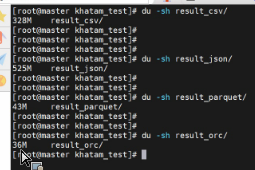

# Read from file

In [25]:
import time


In [26]:
# unix epoch time
# مقدار زمان بر حسب میلی ثانیه از یکم ژانویه سال 1970 تا کنون

In [27]:
epoch_time=int(time.time())

In [28]:
epoch_time

1678615818

In [29]:
def read_from_file():
  start=int(time.time())
  year_count=spark.read.options(header=True).csv('result_csv').groupBy('YearOfPublication').count()
  year_count.show()
  end=int(time.time())
  print(end-start)


In [30]:
read_from_file()

+-----------------+-----+
|YearOfPublication|count|
+-----------------+-----+
|             1953|   15|
|             1957|   20|
|             1987|  574|
|             1956|    7|
|             1936|    3|
|             1958|    7|
|             1972|   52|
|             1988|  677|
|             1977|  100|
|             1971|   30|
|             1984|  437|
|             1982|  299|
|             1941|    2|
|             2005|    1|
|             2000| 3366|
|                0|  610|
|             1965|   34|
|             1962|    8|
|             1954|    7|
|             1930|    7|
+-----------------+-----+
only showing top 20 rows

3


In [31]:
def read_from_file():
  start=int(time.time())
  year_count=spark.read.options(header=True).json('result_json').groupBy('YearOfPublication').count()
  year_count.show()
  end=int(time.time())
  print(end-start)

In [32]:
read_from_file()

+-----------------+-----+
|YearOfPublication|count|
+-----------------+-----+
|             1950|    4|
|             1936|    3|
|             1951|    1|
|                0|  610|
|             1958|    7|
|             1983|  361|
|             1972|   52|
|             1979|   95|
|             1988|  677|
|             1986|  565|
|             1969|   15|
|             1930|    7|
|             1964|    7|
|             1967|    3|
|             1956|    7|
|             1937|    4|
|             1991| 1103|
|             1940|    1|
|             1975|   41|
|             1942|    2|
+-----------------+-----+
only showing top 20 rows

3


In [33]:
#همانطور که مشاهده کردیم زمان مورد نیاز برای خواندن فایل جیسون کمتر است

In [34]:
# حال زمان مورد نیاز برای فایل پارکت را اندازه گیری میکنیم:


In [35]:
def read_from_file():
  start=int(time.time())
  year_count=spark.read.options(header=True).parquet('result_parquet').groupBy('YearOfPublication').count()
  year_count.show()
  end=int(time.time())
  print(end-start)
read_from_file()

+-----------------+-----+
|YearOfPublication|count|
+-----------------+-----+
|             1959|   18|
|             1990| 1133|
|             1975|   41|
|             1977|  100|
|             2003| 3387|
|             1974|   83|
|             1955|    3|
|             1978|  129|
|             1925|    1|
|             1961|    9|
|             1942|    2|
|             1952|    7|
|             1956|    7|
|             1988|  677|
|             1997| 2565|
|             1994| 1938|
|             1968|   10|
|             1951|    1|
|             1930|    7|
|             1973|   36|
+-----------------+-----+
only showing top 20 rows

1


In [36]:
# reading ORC
def read_from_file():
  start=int(time.time())
  year_count=spark.read.options(header=True).orc('result_orc').groupBy('YearOfPublication').count()
  year_count.show()
  end=int(time.time())
  print(end-start)
read_from_file()

AnalysisException: ignored

In [ ]:
# میخواستیم بگوییم که چرا در بیگ دیتا نوع فایل اهمیت دارد. زیرا زمان خواندن و نوشتن و حجم آنها بسیار اهمیت دارد

In [ ]:
# دلتا لیک یک فرمت فایل جدید است.
# https://delta.io/
# دلتا همان پارکت را برداشته و تغییراتی را روی آن داده
# تا دقیقه 44

# next
# API آموزش استفاده از سرویس 

In [37]:
# task: search--> python rest api example
#  weather rest api

In [38]:
import requests

In [39]:
# https://realpython.com/api-integration-in-python/

In [40]:
def get_info_by_id(id):
  api_url='https://jsonplaceholder.typicode.com/todos/1' + str(id)
  response=requests.get(api_url)
  return response.json()
  
get_info_by_id(1)

{'userId': 1,
 'id': 11,
 'title': 'vero rerum temporibus dolor',
 'completed': True}

In [41]:
def get_info_by_id(id):
  api_url='https://jsonplaceholder.typicode.com/todos/2' + str(id)
  response=requests.get(api_url)
  return response.json()


In [42]:
# اطلاعات آیدی یکم را بیرون میکشیم
get_info_by_id(1)

{'userId': 2,
 'id': 21,
 'title': 'suscipit repellat esse quibusdam voluptatem incidunt',
 'completed': False}

In [43]:
# اطلاعات آیدی دوم را بیرون میکشیم
get_info_by_id(2)

{'userId': 2,
 'id': 22,
 'title': 'distinctio vitae autem nihil ut molestias quo',
 'completed': True}

In [ ]:
# تا دقیقه 59

In [44]:
rating_df.show()

+------+----------+----+
|userid|      isbn|rate|
+------+----------+----+
|276725|034545104X|   0|
|276726|0155061224|   5|
|276727|0446520802|   0|
|276729|052165615X|   3|
|276729|0521795028|   6|
|276733|2080674722|   0|
|276736|3257224281|   8|
|276737|0600570967|   6|
|276744|038550120X|   7|
|276745| 342310538|  10|
|276746|0425115801|   0|
|276746|0449006522|   0|
|276746|0553561618|   0|
|276746|055356451X|   0|
|276746|0786013990|   0|
|276746|0786014512|   0|
|276747|0060517794|   9|
|276747|0451192001|   0|
|276747|0609801279|   0|
|276747|0671537458|   9|
+------+----------+----+
only showing top 20 rows



In [45]:
rating_df.withColumn('new_col',get_info_by_id(rating_df['rate'])).show()

TypeError: ignored

In [46]:
# pyspark udf--> user defined function
from pyspark.sql.functions import udf

In [47]:
# udf_name = udf(func, return type)

In [82]:
from pyspark.sql.types import IntegerType
rate_plus_one_udf=udf(lambda x: int(x)+1,IntegerType() )

In [49]:
rating_df.select('rate',rate_plus_one_udf(rating_df['rate'])).show()
# در نتیجه زیر مشاهد می شود که به هر مورد یک واحد اضاف شده است.

+----+--------------+
|rate|<lambda>(rate)|
+----+--------------+
|   0|             1|
|   5|             6|
|   0|             1|
|   3|             4|
|   6|             7|
|   0|             1|
|   8|             9|
|   6|             7|
|   7|             8|
|  10|            11|
|   0|             1|
|   0|             1|
|   0|             1|
|   0|             1|
|   0|             1|
|   0|             1|
|   9|            10|
|   0|             1|
|   0|             1|
|   9|            10|
+----+--------------+
only showing top 20 rows



In [50]:
rating_df.withColumn('new_rate',rate_plus_one_udf(rating_df['rate'])).show()
# difference between withColumns and select is being understood here: 

+------+----------+----+--------+
|userid|      isbn|rate|new_rate|
+------+----------+----+--------+
|276725|034545104X|   0|       1|
|276726|0155061224|   5|       6|
|276727|0446520802|   0|       1|
|276729|052165615X|   3|       4|
|276729|0521795028|   6|       7|
|276733|2080674722|   0|       1|
|276736|3257224281|   8|       9|
|276737|0600570967|   6|       7|
|276744|038550120X|   7|       8|
|276745| 342310538|  10|      11|
|276746|0425115801|   0|       1|
|276746|0449006522|   0|       1|
|276746|0553561618|   0|       1|
|276746|055356451X|   0|       1|
|276746|0786013990|   0|       1|
|276746|0786014512|   0|       1|
|276747|0060517794|   9|      10|
|276747|0451192001|   0|       1|
|276747|0609801279|   0|       1|
|276747|0671537458|   9|      10|
+------+----------+----+--------+
only showing top 20 rows



In [51]:
rate_info_udf=udf(lambda x: get_info_by_id(x))


In [53]:
df3=rating_df.withColumn('rate_info',rate_info_udf(rating_df['rate']))

In [54]:
df3.printSchema()

root
 |-- userid: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- rate: integer (nullable = true)
 |-- rate_info: string (nullable = true)



In [55]:
# سوال
# چه زمانی از udf  استفاده میشود
# یکی از موارد کاربرد آن تبدیل میلادی به شمسی
# یا زمانی که بخواهیم از یک محیط بیرونی دیتا فچ کنیم
# تا ساعت یکم . دقیقه 49


In [83]:
@udf(IntegerType())
def item_plus_5(item):
  return int(item)+5

In [63]:
item_plus_5(5)

10

In [64]:
rating_df.createOrReplaceTempView('rating')

In [86]:
# رجیستر میکنیم که بعد بتوانیم ازش استفاده کنیم. مانند تمپ ویو
spark.udf.register('itemPlusFive',item_plus_5)

<function __main__.item_plus_5(item)>

In [60]:
spark.sql('select * from rating where rate>5').show()

+------+----------+----+
|userid|      isbn|rate|
+------+----------+----+
|276729|0521795028|   6|
|276736|3257224281|   8|
|276737|0600570967|   6|
|276744|038550120X|   7|
|276745| 342310538|  10|
|276747|0060517794|   9|
|276747|0671537458|   9|
|276747|0679776818|   8|
|276747|0943066433|   7|
|276747|1885408226|   7|
|276748|0747558167|   6|
|276751|3596218098|   8|
|276754|0684867621|   8|
|276760|8440682697|  10|
|276762|3453092007|   8|
|276772|0553572369|   7|
|276772|3499230933|  10|
|276772|3596151465|  10|
|276774|3442136644|   9|
|276780|8484330478|   7|
+------+----------+----+
only showing top 20 rows



In [67]:
spark.sql('select *, itemPlusFive(rate) AS ratePlusFive from rating where rate>5').show()

+------+----------+----+------------+
|userid|      isbn|rate|ratePlusFive|
+------+----------+----+------------+
|276729|0521795028|   6|          11|
|276736|3257224281|   8|          13|
|276737|0600570967|   6|          11|
|276744|038550120X|   7|          12|
|276745| 342310538|  10|          15|
|276747|0060517794|   9|          14|
|276747|0671537458|   9|          14|
|276747|0679776818|   8|          13|
|276747|0943066433|   7|          12|
|276747|1885408226|   7|          12|
|276748|0747558167|   6|          11|
|276751|3596218098|   8|          13|
|276754|0684867621|   8|          13|
|276760|8440682697|  10|          15|
|276762|3453092007|   8|          13|
|276772|0553572369|   7|          12|
|276772|3499230933|  10|          15|
|276772|3596151465|  10|          15|
|276774|3442136644|   9|          14|
|276780|8484330478|   7|          12|
+------+----------+----+------------+
only showing top 20 rows



In [91]:
#نکته
#یودی اف لزوما یک پارامتر نمیگیرد
@udf(IntegerType()) 
def rate_plus_userid(item1,item2):
  return int(item1)+int(item2)

In [92]:
rate_plus_userid(str(23),str(45))

Column<'rate_plus_userid(23, 45)'>

In [93]:
rating_df.withColumn('new_col',rate_plus_userid(rating_df['rate'],rating_df['userid'])).show()

+------+----------+----+-------+
|userid|      isbn|rate|new_col|
+------+----------+----+-------+
|276725|034545104X|   0| 276725|
|276726|0155061224|   5| 276731|
|276727|0446520802|   0| 276727|
|276729|052165615X|   3| 276732|
|276729|0521795028|   6| 276735|
|276733|2080674722|   0| 276733|
|276736|3257224281|   8| 276744|
|276737|0600570967|   6| 276743|
|276744|038550120X|   7| 276751|
|276745| 342310538|  10| 276755|
|276746|0425115801|   0| 276746|
|276746|0449006522|   0| 276746|
|276746|0553561618|   0| 276746|
|276746|055356451X|   0| 276746|
|276746|0786013990|   0| 276746|
|276746|0786014512|   0| 276746|
|276747|0060517794|   9| 276756|
|276747|0451192001|   0| 276747|
|276747|0609801279|   0| 276747|
|276747|0671537458|   9| 276756|
+------+----------+----+-------+
only showing top 20 rows



In [80]:
# جمع بندی udf
# زمانی که  میخواهیم با یک محیط بیرونی کار کنیم و در حالتی که با خود اسپارک نیمشود به جواب رسید#
#زمانی که میخواهیم به ازای هر رکورد از وب سرویس داده ای را بیرون بگشیم یا از یک دیتا بیس
# یا در تبدیل تاریخ میلادی به تاریخ شمسی
# برای مثال  ساده تری حالت از یک تابع لامبدا استفاده میکنیم. مانند زیر:
# rate_info_udf=udf(lambda x: get_info_by_id(x))
# و یا میتوان آن را رجیستر نمود  مانند زیر:
#spark.udf.register('itemPlusFive',item_plus_5)

# تا ساعت یکم دقیقه 58

In [105]:
# نکته 
# کارهایی که با اسپارک نمیتوان کرد را با یو دی اف میکنیم
# در زیر میتوان انواع کاربردهای یو دی اف را مشاهده و مطالعه نمود
# ابتدا عبارت زیر را در گوگل سرچ میکنیم:
# from pyspark.sql.functions
# وب سایت زیر کلی اطلاعات مفید دارد:
# https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html
# توصیه میشود حتما یکبار صفحه بالا به طور عملی تمرین گردد
# مثال:

In [96]:
from pyspark.sql.functions import current_timestamp

In [98]:
rating_df.withColumn('ts',current_timestamp()).show(truncate=False)

+------+----------+----+--------------------------+
|userid|isbn      |rate|ts                        |
+------+----------+----+--------------------------+
|276725|034545104X|0   |2023-03-12 11:49:42.007456|
|276726|0155061224|5   |2023-03-12 11:49:42.007456|
|276727|0446520802|0   |2023-03-12 11:49:42.007456|
|276729|052165615X|3   |2023-03-12 11:49:42.007456|
|276729|0521795028|6   |2023-03-12 11:49:42.007456|
|276733|2080674722|0   |2023-03-12 11:49:42.007456|
|276736|3257224281|8   |2023-03-12 11:49:42.007456|
|276737|0600570967|6   |2023-03-12 11:49:42.007456|
|276744|038550120X|7   |2023-03-12 11:49:42.007456|
|276745|342310538 |10  |2023-03-12 11:49:42.007456|
|276746|0425115801|0   |2023-03-12 11:49:42.007456|
|276746|0449006522|0   |2023-03-12 11:49:42.007456|
|276746|0553561618|0   |2023-03-12 11:49:42.007456|
|276746|055356451X|0   |2023-03-12 11:49:42.007456|
|276746|0786013990|0   |2023-03-12 11:49:42.007456|
|276746|0786014512|0   |2023-03-12 11:49:42.007456|
|276747|0060

In [100]:
from pyspark.sql.functions import current_timestamp ,current_date

# تبدیل به پاندا

In [103]:
myPabda=rating_df.toPandas

In [104]:
type(myPabda)

method

# aggregate function

In [107]:
from pyspark.sql.functions import collect_list,collect_set

In [111]:
# rating_df.withColumn('new_list',collect_list(rating_df['userid'])).show(5, truncate=False, vertical=True)
# rating_df.select(collect_list(rating_df['rate']))                 .show(5, truncate=False, vertical=True)
rating_df.select(collect_list(rating_df['rate'])).show(5, truncate=False, vertical=True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [112]:
rating_df.select(collect_set(rating_df['rate'])).show(5, truncate=False, vertical=True)

-RECORD 0-----------------------------------------------
 collect_set(rate) | [0, 9, 1, 5, 2, 6, 3, 10, 7, 4, 8] 



In [ ]:
# موضوع بعدی
spark.udf.register.javaFunction('my_udf',JAR ADDRess)
spark.sql('select *, itemPlusFive(rate) AS my_udf(rate) from rating where rate>5').show()

# hadoop


In [ ]:
# رجوع به جلسه بعد